# Applied Machine Learning- Part 5: UnSupervised learning

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

fruits = pd.read_csv('fruit_data_with_colours.csv')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits['fruit_label'] - 1

## Principal Components Analysis (PCA)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
X_scaled = StandardScaler().fit_transform(X_cancer)
X_pca = PCA(n_components=2).fit_transform(X_scaled)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


In [6]:
from myplt import plot_labelled_scatter

<IPython.core.display.Javascript object>


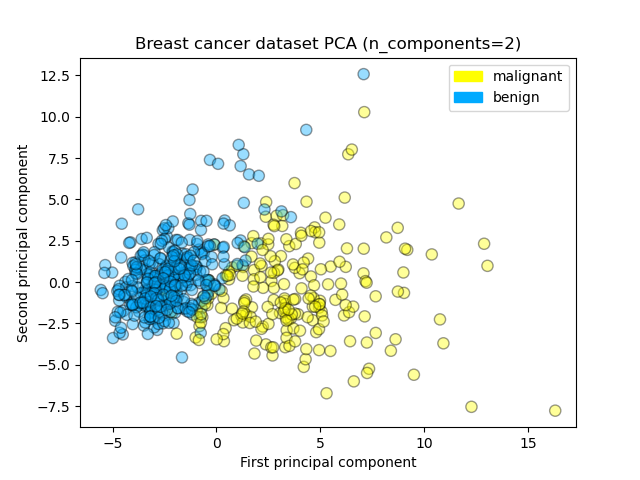

Text(0.5, 1.0, 'Breast cancer dataset PCA (n_components=2)')

In [7]:
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast cancer dataset PCA (n_components=2)')

### Multi-dimensional Scaling (MDS)

In [8]:
from sklearn.manifold import MDS

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


<IPython.core.display.Javascript object>


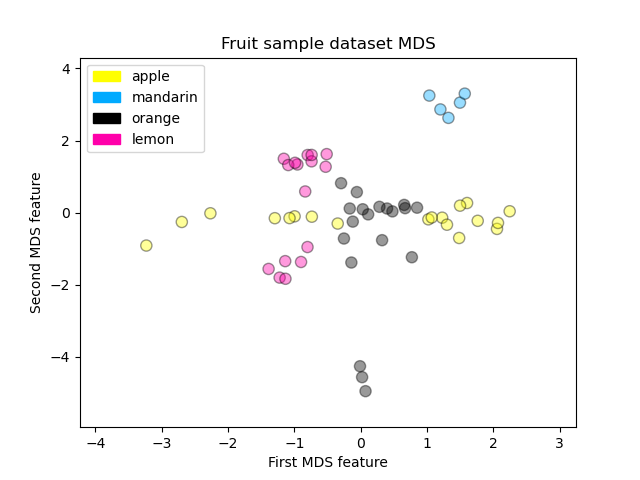

Text(0.5, 1.0, 'Fruit sample dataset MDS')

In [9]:
Xf_scaled = StandardScaler().fit_transform(X_fruits)
X_mds = MDS(n_components=2).fit_transform(Xf_scaled)

plot_labelled_scatter(X_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS')

### t_SNE
#### It is better for datasets that have more well-defined local structure (more clearly defined patterns of neighbors)

In [62]:
from sklearn.manifold import TSNE

<IPython.core.display.Javascript object>


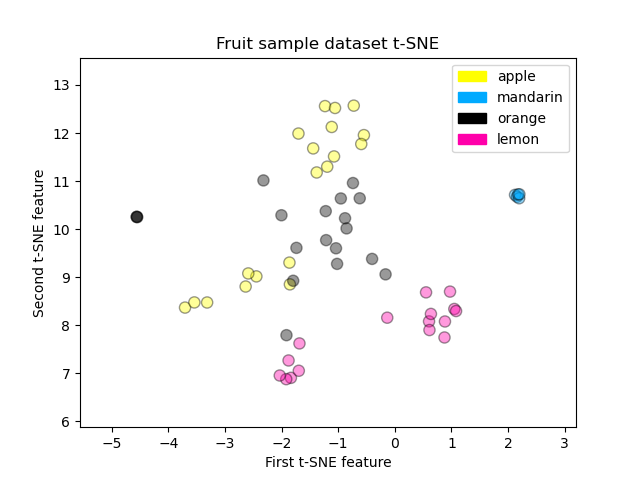

Text(0.5, 1.0, 'Fruit sample dataset t-SNE')

In [64]:
X_tsne = TSNE(random_state=0).fit_transform(Xf_scaled)

plot_labelled_scatter(X_tsne, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruit sample dataset t-SNE')

## Clustering
### K-means

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>


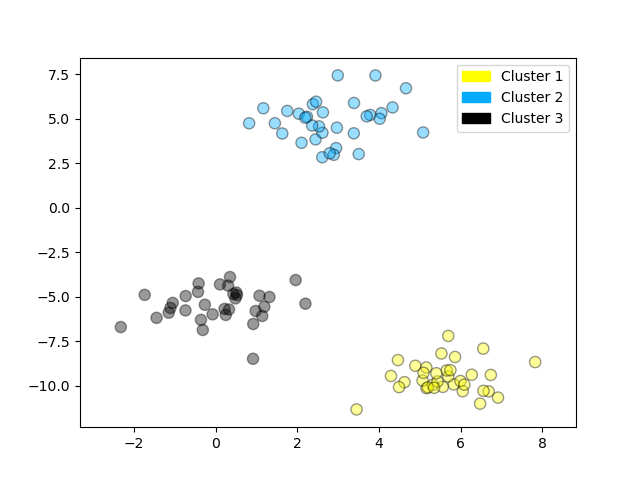

In [18]:
X, y = make_blobs(random_state=10)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2','Cluster 3'])

In [19]:
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>


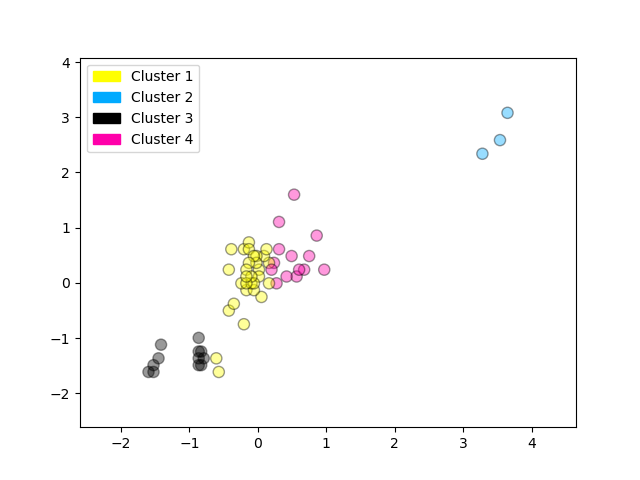

In [24]:
scaler = StandardScaler()
X_fruits_scaled = scaler.fit_transform(X_fruits)

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_fruits)

plot_labelled_scatter(X_fruits_scaled, kmeans.labels_, ['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4'])

### Agglomerative

In [25]:
from sklearn.cluster import AgglomerativeClustering

<IPython.core.display.Javascript object>


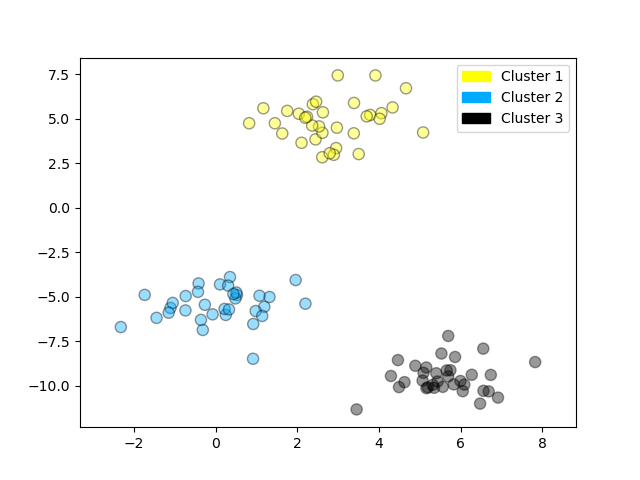

In [29]:
cls = AgglomerativeClustering(n_clusters=3).fit_predict(X)

plot_labelled_scatter(X, cls, ['Cluster 1', 'Cluster 2','Cluster 3'])

### Hierarchy

In [30]:
from scipy.cluster.hierarchy import ward, dendrogram

<IPython.core.display.Javascript object>


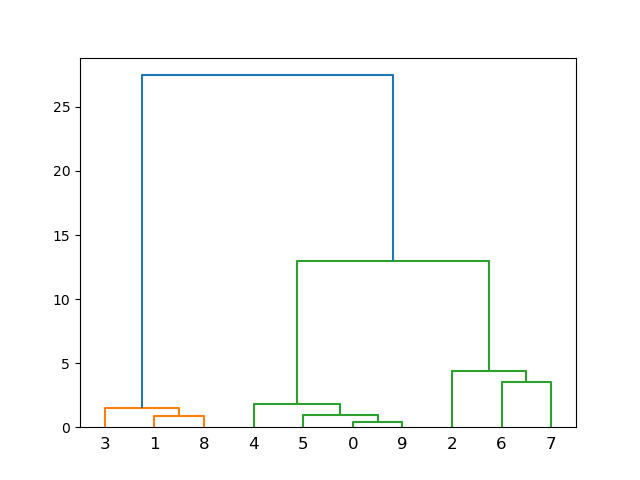

In [31]:
X, y = make_blobs(random_state=10, n_samples=10)
plt.figure()
dendrogram(ward(X))
plt.show()

### DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

<IPython.core.display.Javascript object>


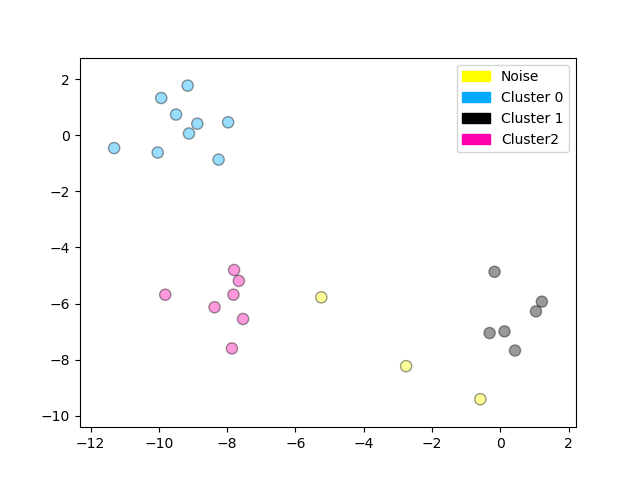

In [45]:
X, y = make_blobs(random_state=9, n_samples=25)

dbscan = DBSCAN(eps=2, min_samples=2).fit_predict(X)

plot_labelled_scatter(X, dbscan + 1, ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster2'])